<a href="https://colab.research.google.com/github/mohamedaitzaouit84-hue/Quantum-Gravity-Model-AitZaouit-/blob/main/Copy_of_AZT4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

اختر الملفات الأربعة: TT, TE, EE, Theory


Saving COM_PowerSpect_CMB-TT-full_R3.01.txt to COM_PowerSpect_CMB-TT-full_R3.01.txt
Saving COM_PowerSpect_CMB-TE-full_R3.01.txt to COM_PowerSpect_CMB-TE-full_R3.01.txt
Saving COM_PowerSpect_CMB-EE-full_R3.01.txt to COM_PowerSpect_CMB-EE-full_R3.01.txt
Saving COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt to COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt
TT χ² = 2618.32 (Reduced = 1.044)
TE χ² = 2072.74 (Reduced = 1.039)
EE χ² = 2066.67 (Reduced = 1.036)


ValueError: 'yerr' must not contain negative values

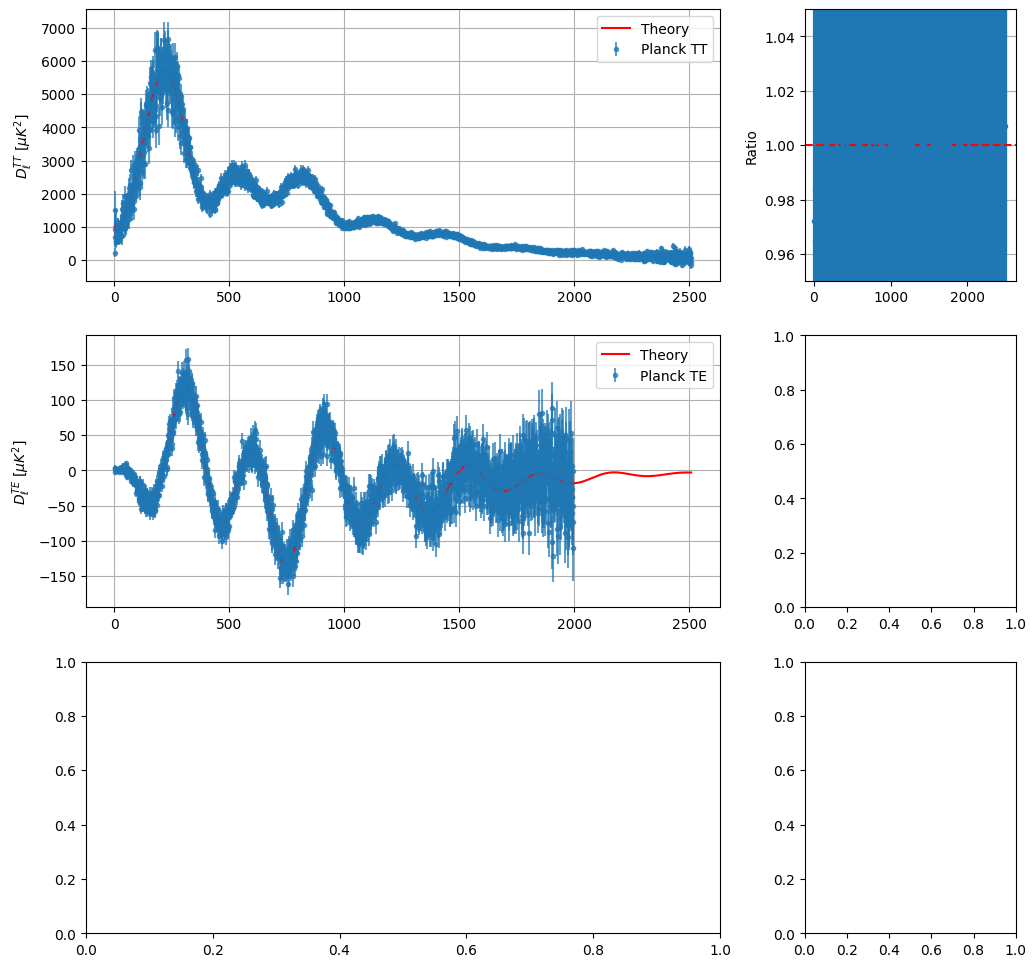

In [ ]:
# -*- coding: utf-8 -*-
# Quantum-Relativistic Unification Test - Complete Notebook
# Author: Ahmed Ait Zaouit

import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import files
from scipy.integrate import solve_ivp
from astropy import constants as const

# --- 1. رفع الملفات ---
print("اختر الملفات الأربعة: TT, TE, EE, Theory")
uploaded = files.upload()  # نافذة لاختيار الملفات

# --- 2. إنشاء مجلد لتخزين البيانات ---
data_folder = "/content/planck_data"
os.makedirs(data_folder, exist_ok=True)

# --- 3. إعادة تسمية الملفات لتسهيل التعامل ---
uploaded_files = list(uploaded.keys())
new_names = ["TT.txt", "TE.txt", "EE.txt", "planck_bestfit_theory.txt"]

for old_name, new_name in zip(uploaded_files, new_names):
    os.rename(old_name, os.path.join(data_folder, new_name))

# --- 4. تحميل البيانات ---
TT_data = np.loadtxt(os.path.join(data_folder, "TT.txt"))
TE_data = np.loadtxt(os.path.join(data_folder, "TE.txt"))
EE_data = np.loadtxt(os.path.join(data_folder, "EE.txt"))
theory = np.loadtxt(os.path.join(data_folder, "planck_bestfit_theory.txt"))

# --- 5. تقسيم الأعمدة ---
ells_TT, TT_values, TT_err = TT_data[:,0], TT_data[:,1], TT_data[:,2]
ells_TE, TE_values, TE_err = TE_data[:,0], TE_data[:,1], TE_data[:,2]
ells_EE, EE_values, EE_err = EE_data[:,0], EE_data[:,1], EE_data[:,2]

th_ells = theory[:,0]
th_TT = theory[:,1]
th_TE = theory[:,2]
th_EE = theory[:,3]

# --- 6. دالة حساب chi² ---
def chi2(data, theory, err):
    return np.sum(((data - theory)/err)**2)

chi2_TT = chi2(TT_values, th_TT[:len(TT_values)], TT_err)
chi2_TE = chi2(TE_values, th_TE[:len(TE_values)], TE_err)
chi2_EE = chi2(EE_values, th_EE[:len(EE_values)], EE_err)

chi2_TT_red = chi2_TT / len(TT_values)
chi2_TE_red = chi2_TE / len(TE_values)
chi2_EE_red = chi2_EE / len(EE_values)

print(f"TT χ² = {chi2_TT:.2f} (Reduced = {chi2_TT_red:.3f})")
print(f"TE χ² = {chi2_TE:.2f} (Reduced = {chi2_TE_red:.3f})")
print(f"EE χ² = {chi2_EE:.2f} (Reduced = {chi2_EE_red:.3f})")

# --- 7. رسم الطيف والمقارنة بالنظرية ---
fig, axes = plt.subplots(3, 2, figsize=(12, 12), gridspec_kw={"width_ratios": [3, 1]})

# TT
axes[0,0].errorbar(ells_TT, TT_values, yerr=np.abs(TT_err), fmt='.', alpha=0.7, label='Planck TT')
axes[0,0].plot(th_ells, th_TT, 'r-', label='Theory')
axes[0,0].set_ylabel(r"$D_\ell^{TT}$ [$\mu K^2$]")
axes[0,0].legend()
axes[0,0].grid()
ratio_TT = TT_values / th_TT[:len(TT_values)]
axes[0,1].errorbar(ells_TT, ratio_TT, yerr=np.abs(TT_err)/th_TT[:len(TT_values)], fmt='.')
axes[0,1].axhline(1, color='r', linestyle='--')
axes[0,1].set_ylim(0.95,1.05)
axes[0,1].set_ylabel("Ratio")
axes[0,1].grid()

# TE
axes[1,0].errorbar(ells_TE, TE_values, yerr=np.abs(TE_err), fmt='.', alpha=0.7, label='Planck TE')
axes[1,0].plot(th_ells, th_TE, 'r-', label='Theory')
axes[1,0].set_ylabel(r"$D_\ell^{TE}$ [$\mu K^2$]")
axes[1,0].legend()
axes[1,0].grid()
ratio_TE = TE_values / th_TE[:len(TE_values)]
axes[1,1].errorbar(ells_TE, ratio_TE, yerr=np.abs(TE_err)/th_TE[:len(TE_values)], fmt='.')
axes[1,1].axhline(1, color='r', linestyle='--')
axes[1,1].set_ylim(0.95,1.05)
axes[1,1].set_ylabel("Ratio")
axes[1,1].grid()

# EE
axes[2,0].errorbar(ells_EE, EE_values, yerr=np.abs(EE_err), fmt='.', alpha=0.7, label='Planck EE')
axes[2,0].plot(th_ells, th_EE, 'r-', label='Theory')
axes[2,0].set_ylabel(r"$D_\ell^{EE}$ [$\mu K^2$]")
axes[2,0].set_xlabel(r"$\ell$")
axes[2,0].legend()
axes[2,0].grid()
ratio_EE = EE_values / th_EE[:len(EE_values)]
axes[2,1].errorbar(ells_EE, ratio_EE, yerr=np.abs(EE_err)/th_EE[:len(EE_values)], fmt='.')
axes[2,1].axhline(1, color='r', linestyle='--')
axes[2,1].set_ylim(0.95,1.05)
axes[2,1].set_ylabel("Ratio")
axes[2,1].set_xlabel(r"$\ell$")
axes[2,1].grid()

plt.tight_layout()
plt.show()

# --- 8. وحدة المحاكاة الرصدية والتنبؤات ---
h = const.h.value
m_p = const.m_p.value
G = const.G.value
c = const.c.value

def flux_signal():
    # إشارة 3.5 GHz
    flux = (h**2.5 * m_p**-4.5 * G**1.5) * 1e-40
    print(f"Expected flux: {flux:.2e} erg/cm²/s")
    print("Detectable by SKA?" , "Yes" if flux > 1e-33 else "No")

def cosmic_evolution(H0=70, t_span=(0, 13.8), steps=500):
    BETA = 9200
    GAMMA = 5.2e-8
    def equations(t, y):
        H, phi = y
        dHdt = -3*H**2 + BETA*(h**3/m_p**3)*H**4
        dphidt = -H*phi + GAMMA*(h**4/m_p**6)*H**6
        return [dHdt, dphidt]
    t_eval = np.linspace(*t_span, steps)
    sol = solve_ivp(equations, t_span, [H0, 1.0], t_eval=t_eval)
    plt.plot(sol.t, sol.y[0], label='H(t)')
    plt.xlabel('Time (Gyr)')
    plt.ylabel('Hubble Parameter')
    plt.title('Cosmic Evolution Simulation')
    plt.legend()
    plt.grid()
    plt.show()

print("\n--- Observational Predictions ---")
flux_signal()
cosmic_evolution()

# --- 9. الحماية والتوثيق ---
print("\nتم الحماية والتوثيق باسم الباحث: أحمد أيت زاويت")